# Распространение циркулярно-поляризованной альфвеновской волны

In [68]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sympy import sin, cos
from math import pi
HLLD_tests = [[],[],[],[]]
space_numbers = [8, 16, 32, 64, 128]
#space_numbers = [16, 32, 64, 128, 256]
h_HLLDs = []
X_max = 1/cos(pi/6)
x0 = 0
L = X_max  - x0
for j in range(5):
    fdata_HLLD = open(f"./OutputData/AlfvenWaveTest_HLLD_{j}",'r')
    lines_HLLD = fdata_HLLD.readlines()
    h_HLLD =  L/space_numbers[j]
    h_HLLDs.append(h_HLLD)
    t0 = float(lines_HLLD[0])
    timesteps_HLLD = lines_HLLD.count('--------\n')-1
    spacesteps_HLLD = lines_HLLD.index('--------\n')-1
    states_HLLD=[[float(x) for x in lines_HLLD[i].split()] for i in range(len(lines_HLLD)-spacesteps_HLLD-1, len(lines_HLLD)-1)]
    vs_HLLD = [[states_HLLD[k][2]/states_HLLD[k][0] for k in range(0, spacesteps_HLLD)]]
    ws_HLLD = [[states_HLLD[k][3]/states_HLLD[k][0] for k in range(0, spacesteps_HLLD)]]
    Bys_HLLD = [[states_HLLD[k][6] for k in range(0, spacesteps_HLLD)]]
    Bzs_HLLD = [[states_HLLD[k][7] for k in range(0, spacesteps_HLLD)]]
    HLLD_tests[0].append(vs_HLLD)
    HLLD_tests[1].append(ws_HLLD)
    HLLD_tests[2].append(Bys_HLLD)
    HLLD_tests[3].append(Bzs_HLLD)
    fdata_HLLD.close()
HLLD_tests[2].reverse()
h_HLLDs.reverse()

In [69]:
HLL_tests = [[],[],[],[]]
space_numbers = [8, 16, 32, 64, 128]
#space_numbers = [16, 32, 64, 128, 256]
h_HLLs = []
X_max = 1/cos(pi/6)
x0 = 0
L = X_max  - x0
for j in range(5):
    fdata_HLL = open(f"./OutputData/AlfvenWaveTest_HLL_{j}",'r')
    lines_HLL = fdata_HLL.readlines()
    h_HLL =  L/space_numbers[j]
    h_HLLs.append(h_HLL)
    t0 = float(lines_HLL[0])
    timesteps_HLL = lines_HLL.count('--------\n')-1
    spacesteps_HLL = lines_HLL.index('--------\n')-1
    states_HLL=[[float(x) for x in lines_HLL[i].split()] for i in range(len(lines_HLL)-spacesteps_HLL-1, len(lines_HLL)-1)]
    vs_HLL = [[states_HLL[k][2]/states_HLL[k][0] for k in range(0, spacesteps_HLL)]]
    ws_HLL = [[states_HLL[k][3]/states_HLL[k][0] for k in range(0, spacesteps_HLL)]]
    Bys_HLL = [[states_HLL[k][6] for k in range(0, spacesteps_HLL)]]
    Bzs_HLL = [[states_HLL[k][7] for k in range(0, spacesteps_HLL)]]
    HLL_tests[0].append(vs_HLL)
    HLL_tests[1].append(ws_HLL)
    HLL_tests[2].append(Bys_HLL)
    HLL_tests[3].append(Bzs_HLL)
    fdata_HLL.close()
HLL_tests[2].reverse()
h_HLLs.reverse()

In [70]:
HLLC_tests = [[],[],[],[]]
space_numbers = [8, 16, 32, 64, 128]
#space_numbers = [16, 32, 64, 128, 256]
h_HLLCs = []
X_max = 1/cos(pi/6)
x0 = 0
L = X_max  - x0
for j in range(5):
    fdata_HLLC = open(f"./OutputData/AlfvenWaveTest_HLLC_{j}",'r')
    lines_HLLC = fdata_HLLC.readlines()
    h_HLLC =  L/space_numbers[j]
    h_HLLCs.append(h_HLLC)
    t0 = float(lines_HLLC[0])
    timesteps_HLLC = lines_HLLC.count('--------\n')-1
    spacesteps_HLLC = lines_HLLC.index('--------\n')-1
    states_HLLC=[[float(x) for x in lines_HLLC[i].split()] for i in range(len(lines_HLLC)-spacesteps_HLLC-1, len(lines_HLLC)-1)]
    vs_HLLC = [[states_HLLC[k][2]/states_HLLC[k][0] for k in range(0, spacesteps_HLLC)]]
    ws_HLLC = [[states_HLLC[k][3]/states_HLLC[k][0] for k in range(0, spacesteps_HLLC)]]
    Bys_HLLC = [[states_HLLC[k][6] for k in range(0, spacesteps_HLLC)]]
    Bzs_HLLC = [[states_HLLC[k][7] for k in range(0, spacesteps_HLLC)]]
    HLLC_tests[0].append(vs_HLLC)
    HLLC_tests[1].append(ws_HLLC)
    HLLC_tests[2].append(Bys_HLLC)
    HLLC_tests[3].append(Bzs_HLLC)
    fdata_HLLC.close()
HLLC_tests[2].reverse()
h_HLLCs.reverse()

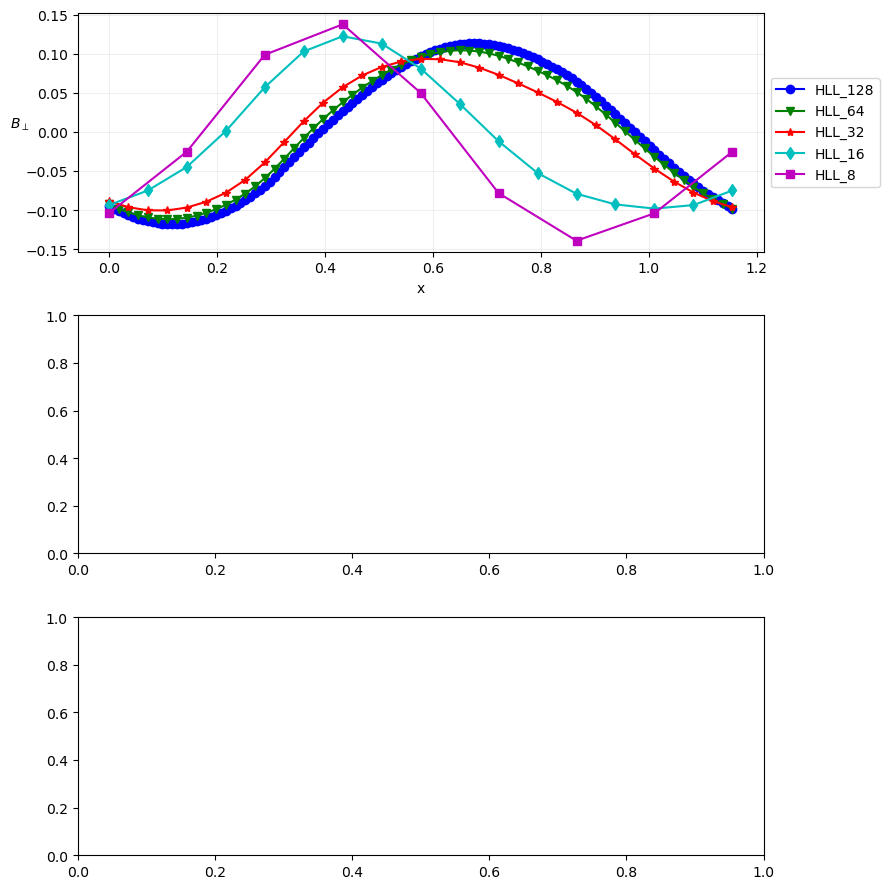

In [71]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(9, 9))

space_numbers.reverse()

colours = ['b','g','r','c','m']
markers = ['o', 'v', '*', 'd', 's']
#ax[0] = fig.add_subplot(321)

for i in range(5):
    x_HLL = np.arange(0, 1/cos(pi/6), h_HLLs[i])
    if(len(x_HLL) != len(HLL_tests[2][i][-1])):
        x_HLL = np.arange(0, 1/cos(pi/6)+ h_HLLs[i], h_HLLs[i])
    ax[0].plot(x_HLL, HLL_tests[2][i][-1], c=colours[i], marker=markers[i], label=f'HLL_{space_numbers[i]}')
    #ax[0,0].scatter(x_HLLD, HLLD_tests[i][-1], s=3,c=colours[i], marker=markers[i], label=f'HLLD_{space_numbers[i]}')
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$B_{\perp}$', rotation=0)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].grid(alpha=0.2)

for i in range(5):
    x_HLLC = np.arange(0, 1/cos(pi/6), h_HLLCs[i])
    if(len(x_HLLC) != len(HLLC_tests[2][i][-1])):
        x_HLLC = np.arange(0, 1/cos(pi/6)+ h_HLLCs[i], h_HLLCs[i])
    ax[1].plot(x_HLLC, HLLC_tests[2][i][-1], c=colours[i], marker=markers[i], label=f'HLLC_{space_numbers[i]}')
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$B_{\perp}$', rotation=0)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].grid(alpha=0.2)


for i in range(5):
    x_HLLD = np.arange(0, 1/cos(pi/6), h_HLLDs[i])
    if(len(x_HLLD) != len(HLLD_tests[2][i][-1])):
        x_HLLD = np.arange(0, 1/cos(pi/6)+ h_HLLDs[i], h_HLLDs[i])
    ax[2].plot(x_HLLD, HLLD_tests[2][i][-1], c=colours[i], marker=markers[i], label=f'HLLD_{space_numbers[i]}')
ax[2].set_xlabel('x')
ax[2].set_ylabel(r'$B_{\perp}$', rotation=0)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].grid(alpha=0.2)

fig.tight_layout()

plt.savefig(f"./OutputData/AlfvenWaves.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [72]:
from math import log2

def delta_err(psi, psi_e):
    sum_psie = 0
    sum_diffs = 0
    for i in range(len(psi)):
        sum_psie += abs(psi_e[i])
        sum_diffs += abs(psi[i]-psi_e[i])
    return sum_diffs / sum_psie
def R_conv_speed(delta1, delta2):
    return log2(delta1/delta2)

# Сходимость и погрешность

In [73]:
HLL_tests[2].reverse()
vy_exact_HLL = HLL_tests[0][4][-1]
wy_exact_HLL = HLL_tests[1][4][-1]
By_exact_HLL = HLL_tests[2][4][-1]
Bz_exact_HLL = HLL_tests[3][4][-1]

In [74]:
deltas_v_HLL = [delta_err(HLL_tests[0][i][-1], vy_exact_HLL[0::2**(4-i)]) for i in range(4)]
deltas_w_HLL = [delta_err(HLL_tests[1][i][-1], wy_exact_HLL[0::2**(4-i)]) for i in range(4)]
deltas_By_HLL = [delta_err(HLL_tests[2][i][-1], By_exact_HLL[0::2**(4-i)]) for i in range(4)]
deltas_Bz_HLL = [delta_err(HLL_tests[3][i][-1], Bz_exact_HLL[0::2**(4-i)]) for i in range(4)]

In [75]:
deltas_HLL = [0.25*(deltas_v_HLL[i] + deltas_w_HLL[i] + deltas_By_HLL[i] + deltas_Bz_HLL[i]) for i in range(4)]

In [76]:
Rns_HLL = [R_conv_speed(deltas_HLL[i], deltas_HLL[i+1]) for i in range(3)]

In [77]:
HLLC_tests[2].reverse()
vy_exact_HLLC = HLLC_tests[0][4][-1]
wy_exact_HLLC = HLLC_tests[1][4][-1]
By_exact_HLLC = HLLC_tests[2][4][-1]
Bz_exact_HLLC = HLLC_tests[3][4][-1]

In [78]:
deltas_v_HLLC = [delta_err(HLLC_tests[0][i][-1], vy_exact_HLLC[0::2**(4-i)]) for i in range(4)]
deltas_w_HLLC = [delta_err(HLLC_tests[1][i][-1], wy_exact_HLLC[0::2**(4-i)]) for i in range(4)]
deltas_By_HLLC = [delta_err(HLLC_tests[2][i][-1], By_exact_HLLC[0::2**(4-i)]) for i in range(4)]
deltas_Bz_HLLC = [delta_err(HLLC_tests[3][i][-1], Bz_exact_HLLC[0::2**(4-i)]) for i in range(4)]

In [79]:
deltas_HLLC = [0.25*(deltas_v_HLLC[i] + deltas_w_HLLC[i] + deltas_By_HLLC[i] + deltas_Bz_HLLC[i]) for i in range(4)]

In [80]:
Rns_HLLC = [R_conv_speed(deltas_HLLC[i], deltas_HLLC[i+1]) for i in range(3)]

In [81]:
HLLD_tests[2].reverse()
vy_exact_HLLD = HLLD_tests[0][4][-1]
wy_exact_HLLD = HLLD_tests[1][4][-1]
By_exact_HLLD = HLLD_tests[2][4][-1]
Bz_exact_HLLD = HLLD_tests[3][4][-1]

In [82]:
deltas_v_HLLD = [delta_err(HLLD_tests[0][i][-1], vy_exact_HLLD[0::2**(4-i)]) for i in range(4)]
deltas_w_HLLD = [delta_err(HLLD_tests[1][i][-1], wy_exact_HLLD[0::2**(4-i)]) for i in range(4)]
deltas_By_HLLD = [delta_err(HLLD_tests[2][i][-1], By_exact_HLLD[0::2**(4-i)]) for i in range(4)]
deltas_Bz_HLLD = [delta_err(HLLD_tests[3][i][-1], Bz_exact_HLLD[0::2**(4-i)]) for i in range(4)]

In [83]:
deltas_HLLD = [0.25*(deltas_v_HLLD[i] + deltas_w_HLLD[i] + deltas_By_HLLD[i] + deltas_Bz_HLLD[i]) for i in range(4)]

In [84]:
Rns_HLLD = [R_conv_speed(deltas_HLLD[i], deltas_HLLD[i+1]) for i in range(3)]

In [85]:
import pandas as pd

In [86]:
listmy = [[deltas_HLL[i], Rns_HLL[i-1],deltas_HLLC[i], Rns_HLLC[i-1],deltas_HLLD[i], Rns_HLLD[i-1]] for i in range(1,4)]
listmy.insert(0,[deltas_HLL[0], '-',deltas_HLLC[0], '-',deltas_HLLD[0], '-'])
df = pd.DataFrame(listmy,
                  index=pd.Index(['8', '16', '32', '64'], name=r'$N$'),
                  columns=pd.MultiIndex.from_product([['HLL', 'HLLC', 'HLLD'],[r'$\delta_N$', r'R_N']]))
df

HLL                 HLLC                 HLLD          
    $\delta_N$       R_N $\delta_N$       R_N $\delta_N$       R_N
$N$                                                               
8     1.097593         -   1.090527         -   1.094265         -
16    0.688809  0.672167   0.685107  0.670625   0.686422  0.672795
32    0.203056  1.762226   0.201102  1.768404   0.201834  1.765926
64    0.068618  1.565224   0.067955  1.565265   0.068175  1.565845

In [87]:
print(df.to_latex())

\begin{tabular}{lrlrlrl}
\toprule
 & \multicolumn{2}{r}{HLL} & \multicolumn{2}{r}{HLLC} & \multicolumn{2}{r}{HLLD} \\
 & $\delta_N$ & R_N & $\delta_N$ & R_N & $\delta_N$ & R_N \\
$N$ &  &  &  &  &  &  \\
\midrule
8 & 1.097593 & - & 1.090527 & - & 1.094265 & - \\
16 & 0.688809 & 0.672167 & 0.685107 & 0.670625 & 0.686422 & 0.672795 \\
32 & 0.203056 & 1.762226 & 0.201102 & 1.768404 & 0.201834 & 1.765926 \\
64 & 0.068618 & 1.565224 & 0.067955 & 1.565265 & 0.068175 & 1.565845 \\
\bottomrule
\end{tabular}

